Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from math import exp
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

Importing datasets

In [2]:
data1 = pd.read_csv('C:/KUSHAL/Projects/Kaggle/Rohlik Sales Forecasting/inbox/sales_train.csv', encoding = 'utf-8')
data2 = pd.read_csv('C:/KUSHAL/Projects/Kaggle/Rohlik Sales Forecasting/inbox/sales_test.csv', encoding = 'utf-8')
data3 = pd.read_csv('C:/KUSHAL/Projects/Kaggle/Rohlik Sales Forecasting/inbox/calendar.csv', encoding = 'utf-8')
data4 = pd.read_csv('C:/KUSHAL/Projects/Kaggle/Rohlik Sales Forecasting/inbox/inventory.csv', encoding = 'utf-8')
data5 = pd.read_csv('C:/KUSHAL/Projects/Kaggle/Rohlik Sales Forecasting/inbox/solution.csv', encoding = 'utf-8')
data6 = pd.read_csv('C:/KUSHAL/Projects/Kaggle/Rohlik Sales Forecasting/inbox/test_weights.csv', encoding = 'utf-8')
print("Datasets successfully imported")

Datasets successfully imported


In [3]:
print(data1.info())
print(data1.isnull().sum()) #info of train set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4007419 entries, 0 to 4007418
Data columns (total 14 columns):
 #   Column           Dtype  
---  ------           -----  
 0   unique_id        int64  
 1   date             object 
 2   warehouse        object 
 3   total_orders     float64
 4   sales            float64
 5   sell_price_main  float64
 6   availability     float64
 7   type_0_discount  float64
 8   type_1_discount  float64
 9   type_2_discount  float64
 10  type_3_discount  float64
 11  type_4_discount  float64
 12  type_5_discount  float64
 13  type_6_discount  float64
dtypes: float64(11), int64(1), object(2)
memory usage: 428.0+ MB
None
unique_id           0
date                0
warehouse           0
total_orders       52
sales              52
sell_price_main     0
availability        0
type_0_discount     0
type_1_discount     0
type_2_discount     0
type_3_discount     0
type_4_discount     0
type_5_discount     0
type_6_discount     0
dtype: int64


In [4]:
pd.set_option('display.max_rows', None)
null_count = data1[data1['total_orders'].isnull() & data1['sales'].isnull()]['date']
print(null_count)

154017     2021-05-23
154099     2021-05-21
154149     2021-05-24
154155     2021-05-22
429815     2021-12-10
429860     2021-12-09
733468     2021-06-27
734198     2021-06-26
738594     2021-05-29
738600     2021-05-23
738632     2021-05-31
738769     2021-05-22
738805     2021-05-30
738816     2021-05-21
738994     2021-05-24
1028203    2021-05-22
1028500    2021-05-23
1028566    2021-05-24
1028753    2021-05-21
1231189    2021-05-21
1231497    2021-05-23
1231500    2021-05-22
1231580    2021-05-29
1231636    2021-05-31
1231739    2021-05-24
1231755    2021-05-30
1451592    2021-06-20
1451661    2021-06-12
1451854    2021-07-04
1451892    2021-06-27
1452131    2021-06-19
1452275    2021-06-13
1452400    2021-07-11
1452632    2021-06-26
3464803    2021-05-23
3464921    2021-05-31
3464993    2021-05-21
3465006    2021-05-24
3465126    2021-05-30
3465135    2021-05-22
3465197    2021-05-29
3744049    2021-07-11
3860150    2021-06-12
3860232    2021-06-13
3862121    2021-12-09
3862202   

In [5]:
pd.set_option('display.max_rows', None)
matching_rows = data3[data3['date'].isin(null_count)][['date', 'holiday', 'warehouse']]
print(matching_rows)

             date  holiday    warehouse
230    2021-06-13        0     Munich_1
470    2021-07-04        0     Prague_1
776    2021-06-19        0   Budapest_1
1079   2021-12-09        0       Brno_1
1091   2021-12-10        0     Prague_2
1118   2021-07-04        0       Brno_1
1255   2021-06-26        0     Prague_3
1568   2021-05-22        0     Prague_1
1740   2021-05-31        0     Munich_1
2315   2021-07-04        0     Prague_2
2422   2021-12-09        0     Prague_2
2432   2021-07-11        0       Brno_1
2497   2021-06-27        0  Frankfurt_1
2548   2021-06-27        0     Prague_3
2553   2021-06-20        0     Munich_1
2561   2021-06-12        0   Budapest_1
3807   2021-06-20        0  Frankfurt_1
4733   2021-05-21        0  Frankfurt_1
5063   2021-05-24        1   Budapest_1
5120   2021-05-30        0     Prague_1
5126   2021-05-29        0       Brno_1
5182   2021-06-19        0     Prague_2
5221   2021-05-30        0   Budapest_1
5382   2021-05-31        0  Frankfurt_1


In [6]:
for date in null_count:
    data1.loc[data1['date'] == date, 'total_orders'] = data1.loc[
    data1['date'] <= date, 'total_orders'].rolling(window = 7, min_periods = 1).mean().iloc[-1]
    data1.loc[data1['date'] == date, 'sales'] = data1.loc[
    data1['date'] <= date, 'sales'].rolling(window = 7, min_periods = 1).mean().iloc[-1]
print(data1.isnull().sum())
print(data1.shape)

unique_id          0
date               0
warehouse          0
total_orders       0
sales              0
sell_price_main    0
availability       0
type_0_discount    0
type_1_discount    0
type_2_discount    0
type_3_discount    0
type_4_discount    0
type_5_discount    0
type_6_discount    0
dtype: int64
(4007419, 14)


In [7]:
print(data2.info())
print(data2.isnull().sum()) #info of test set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47021 entries, 0 to 47020
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   unique_id        47021 non-null  int64  
 1   date             47021 non-null  object 
 2   warehouse        47021 non-null  object 
 3   total_orders     47021 non-null  float64
 4   sell_price_main  47021 non-null  float64
 5   type_0_discount  47021 non-null  float64
 6   type_1_discount  47021 non-null  float64
 7   type_2_discount  47021 non-null  float64
 8   type_3_discount  47021 non-null  float64
 9   type_4_discount  47021 non-null  float64
 10  type_5_discount  47021 non-null  float64
 11  type_6_discount  47021 non-null  float64
dtypes: float64(9), int64(1), object(2)
memory usage: 4.3+ MB
None
unique_id          0
date               0
warehouse          0
total_orders       0
sell_price_main    0
type_0_discount    0
type_1_discount    0
type_2_discount    0
type_3_disco

In [8]:
data2.date.value_counts().sort_index()

date
2024-06-03    3386
2024-06-04    3417
2024-06-05    3450
2024-06-06    3439
2024-06-07    3419
2024-06-08    3362
2024-06-09    3294
2024-06-10    3315
2024-06-11    3323
2024-06-12    3360
2024-06-13    3349
2024-06-14    3353
2024-06-15    3309
2024-06-16    3245
Name: count, dtype: int64

In [9]:
print(data3.info())
print(data3.isnull().sum()) #info of calender set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23016 entries, 0 to 23015
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   date                    23016 non-null  object
 1   holiday_name            930 non-null    object
 2   holiday                 23016 non-null  int64 
 3   shops_closed            23016 non-null  int64 
 4   winter_school_holidays  23016 non-null  int64 
 5   school_holidays         23016 non-null  int64 
 6   warehouse               23016 non-null  object
dtypes: int64(4), object(3)
memory usage: 1.2+ MB
None
date                          0
holiday_name              22086
holiday                       0
shops_closed                  0
winter_school_holidays        0
school_holidays               0
warehouse                     0
dtype: int64


In [10]:
print(data4.info())
print(data4.isnull().sum()) #info of inventory set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5432 entries, 0 to 5431
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   unique_id            5432 non-null   int64 
 1   product_unique_id    5432 non-null   int64 
 2   name                 5432 non-null   object
 3   L1_category_name_en  5432 non-null   object
 4   L2_category_name_en  5432 non-null   object
 5   L3_category_name_en  5432 non-null   object
 6   L4_category_name_en  5432 non-null   object
 7   warehouse            5432 non-null   object
dtypes: int64(2), object(6)
memory usage: 339.6+ KB
None
unique_id              0
product_unique_id      0
name                   0
L1_category_name_en    0
L2_category_name_en    0
L3_category_name_en    0
L4_category_name_en    0
warehouse              0
dtype: int64


In [11]:
print(data5.info())
print(data5.isnull().sum()) #info of solution set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47021 entries, 0 to 47020
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         47021 non-null  object
 1   sales_hat  47021 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 734.8+ KB
None
id           0
sales_hat    0
dtype: int64


In [12]:
print(data6.info())
print(data6.isnull().sum()) #info of test weights set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5390 entries, 0 to 5389
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   unique_id  5390 non-null   int64  
 1   weight     5390 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 84.3 KB
None
unique_id    0
weight       0
dtype: int64


In [13]:
merge1 = pd.merge(data1, data6, on = 'unique_id', how = 'left')
print(merge1.shape)

(4007419, 15)


In [14]:
merge2 = pd.merge(merge1, data3, on = ['date', 'warehouse'], how = 'left')
print(merge2.shape)

(4007419, 20)


In [15]:
merge3 = pd.merge(merge2, data4, on = ['unique_id', 'warehouse'], how = 'left')
print(merge3.shape)

(4007419, 26)


In [16]:
merge3['date'] = pd.to_datetime(merge3['date'], errors = 'coerce')
merge3['day'] = merge3['date'].dt.day
merge3['month'] = merge3['date'].dt.month
merge3['year'] = merge3['date'].dt.year
print(merge3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4007419 entries, 0 to 4007418
Data columns (total 29 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   unique_id               int64         
 1   date                    datetime64[ns]
 2   warehouse               object        
 3   total_orders            float64       
 4   sales                   float64       
 5   sell_price_main         float64       
 6   availability            float64       
 7   type_0_discount         float64       
 8   type_1_discount         float64       
 9   type_2_discount         float64       
 10  type_3_discount         float64       
 11  type_4_discount         float64       
 12  type_5_discount         float64       
 13  type_6_discount         float64       
 14  weight                  float64       
 15  holiday_name            object        
 16  holiday                 int64         
 17  shops_closed            int64         
 18  wi

In [17]:
merge4 = pd.merge(data2, data3, on = ['date', 'warehouse'], how = 'left')
print(merge4.shape)

(47021, 17)


In [18]:
merge5 = pd.merge(merge4, data4, on = ['unique_id', 'warehouse'], how = 'left')
print(merge5.shape)

(47021, 23)


In [19]:
merge5['date'] = pd.to_datetime(merge5['date'], errors = 'coerce')
merge5['day'] = merge5['date'].dt.day
merge5['month'] = merge5['date'].dt.month
merge5['year'] = merge5['date'].dt.year
print(merge5.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47021 entries, 0 to 47020
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   unique_id               47021 non-null  int64         
 1   date                    47021 non-null  datetime64[ns]
 2   warehouse               47021 non-null  object        
 3   total_orders            47021 non-null  float64       
 4   sell_price_main         47021 non-null  float64       
 5   type_0_discount         47021 non-null  float64       
 6   type_1_discount         47021 non-null  float64       
 7   type_2_discount         47021 non-null  float64       
 8   type_3_discount         47021 non-null  float64       
 9   type_4_discount         47021 non-null  float64       
 10  type_5_discount         47021 non-null  float64       
 11  type_6_discount         47021 non-null  float64       
 12  holiday_name            477 non-null    object

In [20]:
merge3['log_sales'] = np.log(merge3['sales'] + 1)
merge3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4007419 entries, 0 to 4007418
Data columns (total 30 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   unique_id               int64         
 1   date                    datetime64[ns]
 2   warehouse               object        
 3   total_orders            float64       
 4   sales                   float64       
 5   sell_price_main         float64       
 6   availability            float64       
 7   type_0_discount         float64       
 8   type_1_discount         float64       
 9   type_2_discount         float64       
 10  type_3_discount         float64       
 11  type_4_discount         float64       
 12  type_5_discount         float64       
 13  type_6_discount         float64       
 14  weight                  float64       
 15  holiday_name            object        
 16  holiday                 int64         
 17  shops_closed            int64         
 18  wi

In [21]:
merge3 = merge3.drop(columns=['availability'])
print("Column dropped Successfully")

Column dropped Successfully


In [22]:
PERIODS = [14,16,18,21,30,60,90,120,180,270,350,600,1000]
def add_date_features(merge3):
    merge3['date_month'] = merge3['date'].dt.month
    merge3['date_year'] = merge3['date'].dt.year
    merge3['date_day'] = merge3['date'].dt.day
    merge3['date_weekofyear'] = merge3['date'].dt.isocalendar().week
    merge3['date_weekday'] = merge3['date'].dt.weekday 
    merge3['date_dayofyear'] = merge3['date'].dt.dayofyear
    merge3['date_year_sin'] = np.sin((merge3['date_year'] - merge3['date_year'].min()) / (merge3['date_year'].max() - merge3['date_year'].min()) * 2 * np.pi)
    return merge3

def add_product_category(merge3):
    merge3['category'] = merge3['name'].str.split('_',expand=True)[0]
    return merge3

def add_lagged_product_sales(merge3, periods):
    # Sort by warehouse, name, and date for correct time order
    merge3 = merge3.sort_values(by=['warehouse', 'name', 'date'])
    
    # Iterate over each defined period (e.g., 14, 30, 90 days)
    for shift in periods:
        # Create a new column for each period's lagged sales using shift
        merge3[f'product_sales_{shift}'] = np.nan
        
        # Group by 'warehouse' and 'name', then apply shift for each group
        merge3[f'product_sales_{shift}'] = merge3.groupby(['warehouse', 'name'])['sales'] \
            .shift(periods=shift)        
    return merge3

In [23]:
merge3 = add_date_features(merge3)
merge3 = add_product_category(merge3)
merge3 = add_lagged_product_sales(merge3,PERIODS)

In [24]:
for col in merge3.select_dtypes("object").columns:
    merge3[col] = merge3[col].astype('category')

In [25]:
train_start_date  = '2020-08-01'
train_end_date  = '2024-01-01'

train = merge3[(merge3['date'] >= train_start_date) & (merge3['date'] <= train_end_date)]
test  = merge3[(merge3['date'] >  train_end_date)]

X_train = train.drop(['sales', 'date'], axis=1)
y_train = train['log_sales']

X_test = test.drop(['sales', 'date'], axis=1)

In [26]:
params = {
    'learning_rate': 0.021796506746095975, 
    'max_depth': 10,                       
    'min_child_weight': 25,                
    'subsample': 0.7057135664023435,       
    'colsample_bytree': 0.8528497905459008,
    'alpha': 0.036786449788597686,         
    'lambda': 0.3151110021900479,          
    'n_estimators': 1000,                  
    'objective': 'regression',       
    'eval_metric': 'mae',                  
    'booster': 'gbtree',                   
    'random_state': 42                     
}

In [27]:
model = lgb.LGBMRegressor(**params)
model.fit(X_train, y_train)

[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.3151110021900479. Current value: lambda_l2=0.3151110021900479
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.3151110021900479. Current value: lambda_l2=0.3151110021900479
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.397876 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8890
[Ligh

LGBMRegressor(alpha=0.036786449788597686, booster='gbtree',
              colsample_bytree=0.8528497905459008, eval_metric='mae',
              lambda=0.3151110021900479, learning_rate=0.021796506746095973,
              max_depth=10, min_child_weight=25, n_estimators=1000,
              objective='regression', random_state=42,
              subsample=0.7057135664023435)

In [29]:
y_pred = np.exp(model.predict(X_test)) - 1
y_pred[y_pred<0]=0

[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=0.3151110021900479. Current value: lambda_l2=0.3151110021900479
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Unknown parameter: booster


In [30]:
test['id'] = test['unique_id'].astype(str) + "_" + test['date'].astype(str)
test['sales_hat'] = y_pred
test[['id','sales_hat']].to_csv("submission.csv",index=False)

C:\Users\HP\AppData\Local\Temp\ipykernel_7172\1059881284.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['id'] = test['unique_id'].astype(str) + "_" + test['date'].astype(str)
C:\Users\HP\AppData\Local\Temp\ipykernel_7172\1059881284.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['sales_hat'] = y_pred


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

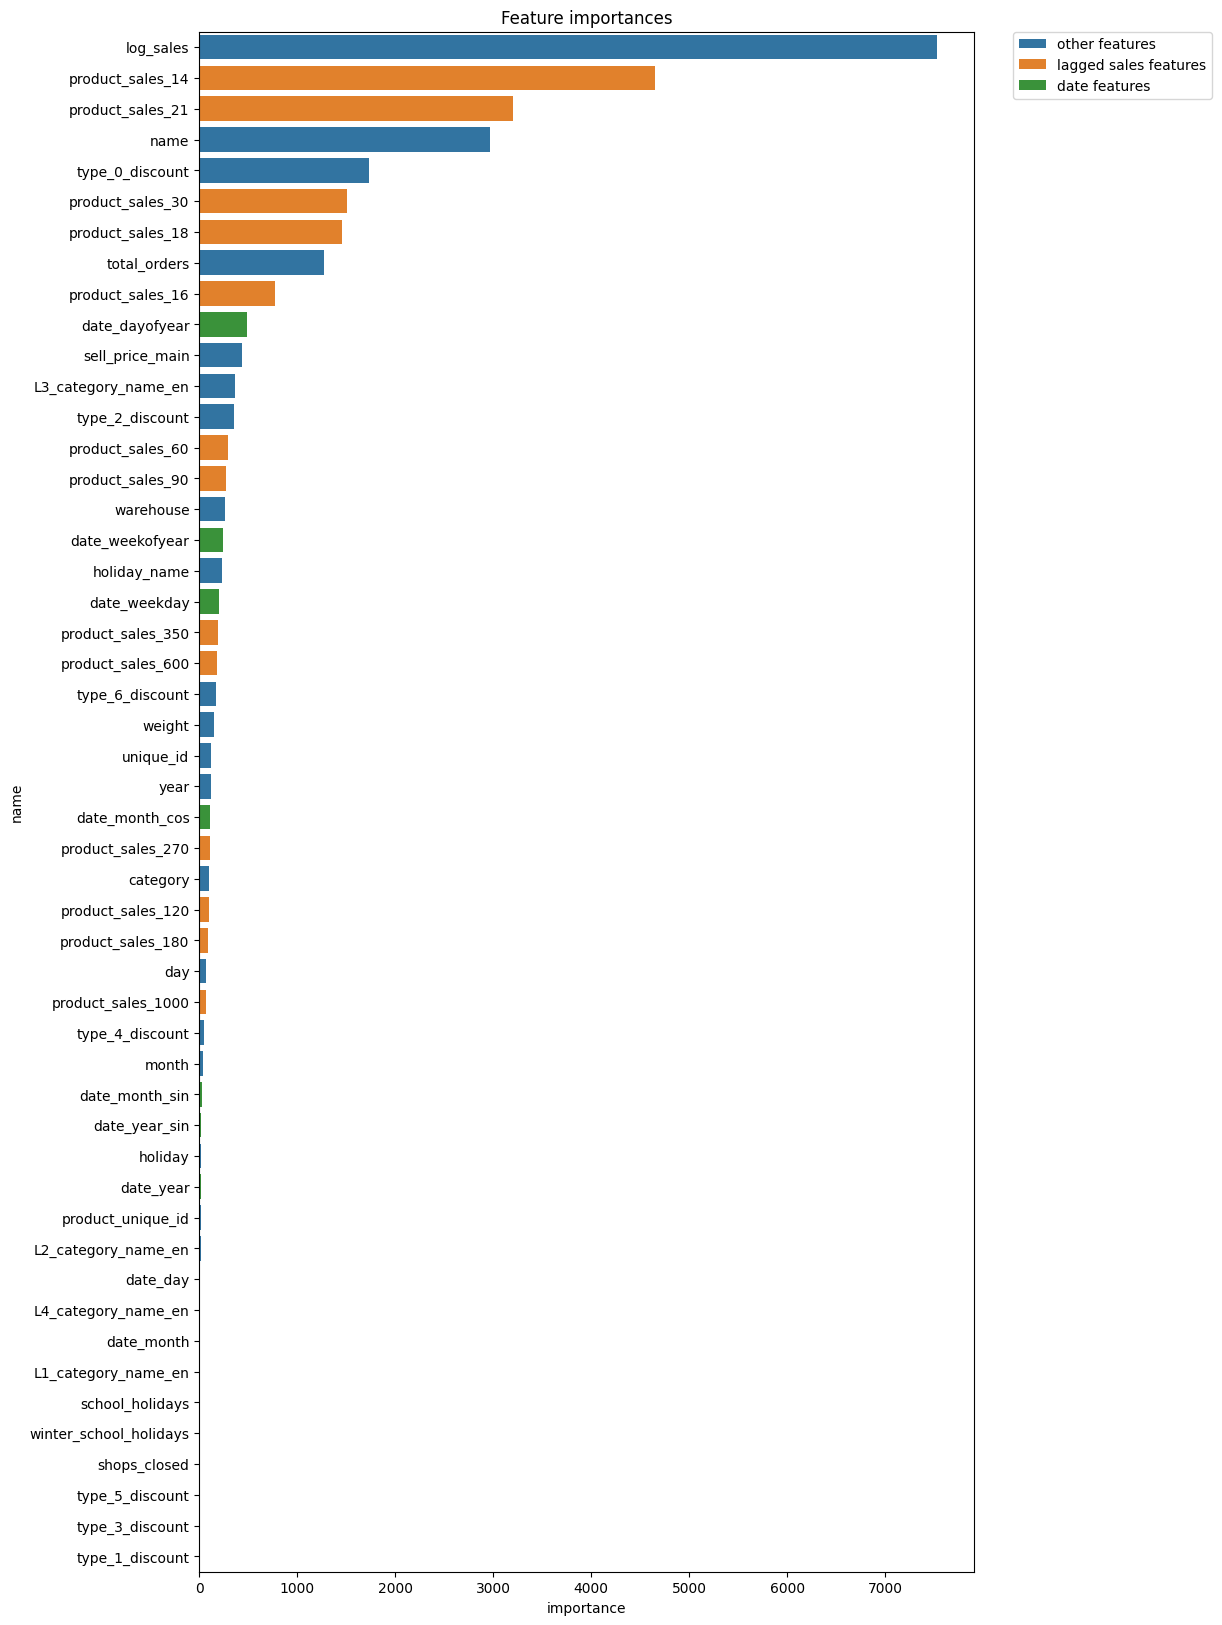

In [28]:
feature_importance_df = pd.DataFrame({'name':model.feature_name_})
feature_importance_df['importance'] = model.feature_importances_
feature_importance_df['group'] = feature_importance_df['name'].apply(
    lambda x: 'lagged sales features' if 'product_sales_' in x else 'date features' if 'date_' in x else 'other features')
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 20))
ax = sns.barplot(data=feature_importance_df, x='importance', y='name',  hue='group', dodge=False)
ax.set_title(f"Feature importances")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

In [41]:
mae = mean_absolute_error(y_train, y_train_pred_lgbm)
mse = mean_squared_error(y_train, y_train_pred_lgbm)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_train_pred_lgbm)

print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R² Score: {r2:.4f}')

MAE: 104.6877
MSE: 129691.4328
RMSE: 360.1270
R² Score: -77706.7836
